In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/saprativasarkar/Desktop/ML/10_Python_and_OOPS/11_statistics/dataset/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Survived

In [7]:
# Survived is discrete feature
# majority of people does not survived
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

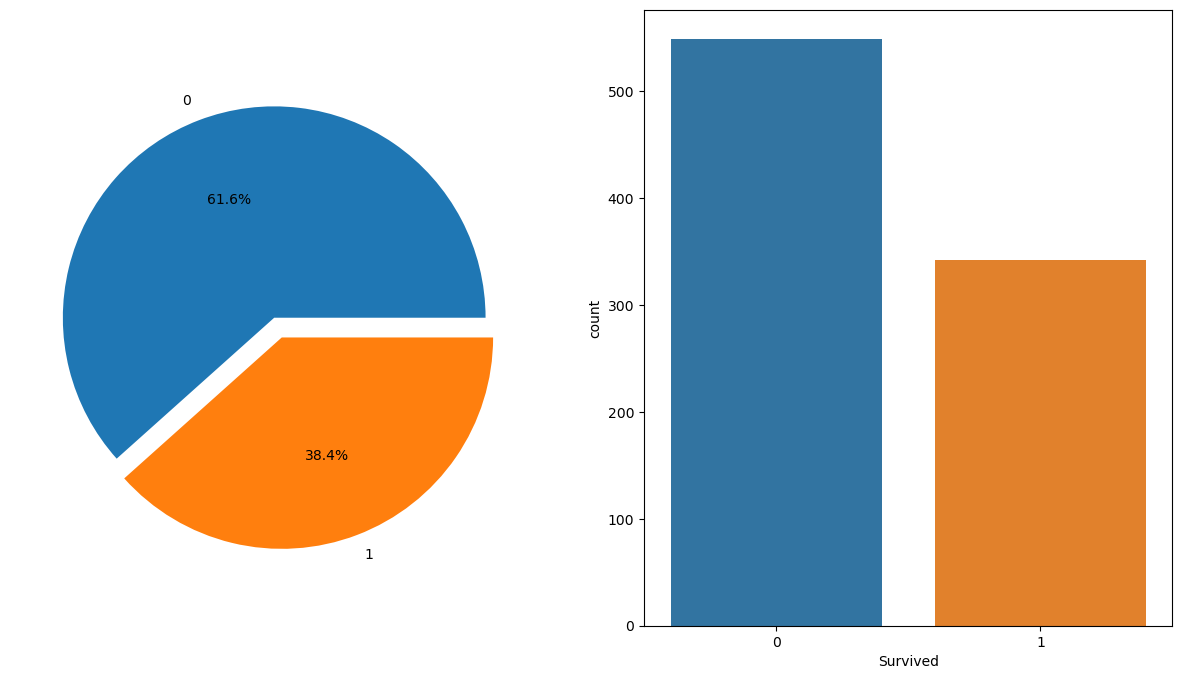

In [34]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.pie(x=df['Survived'].value_counts(),labels=[0,1],explode=[0,0.1], autopct = "%1.1f%%")
plt.subplot(1,2,2)
sns.countplot(data=df,x='Survived')
plt.show()

## Sex

In [31]:
pivot = pd.crosstab(index=df["Survived"],columns=df["Sex"])
pivot

Sex,female,male
Survived,,
0,81,468
1,233,109


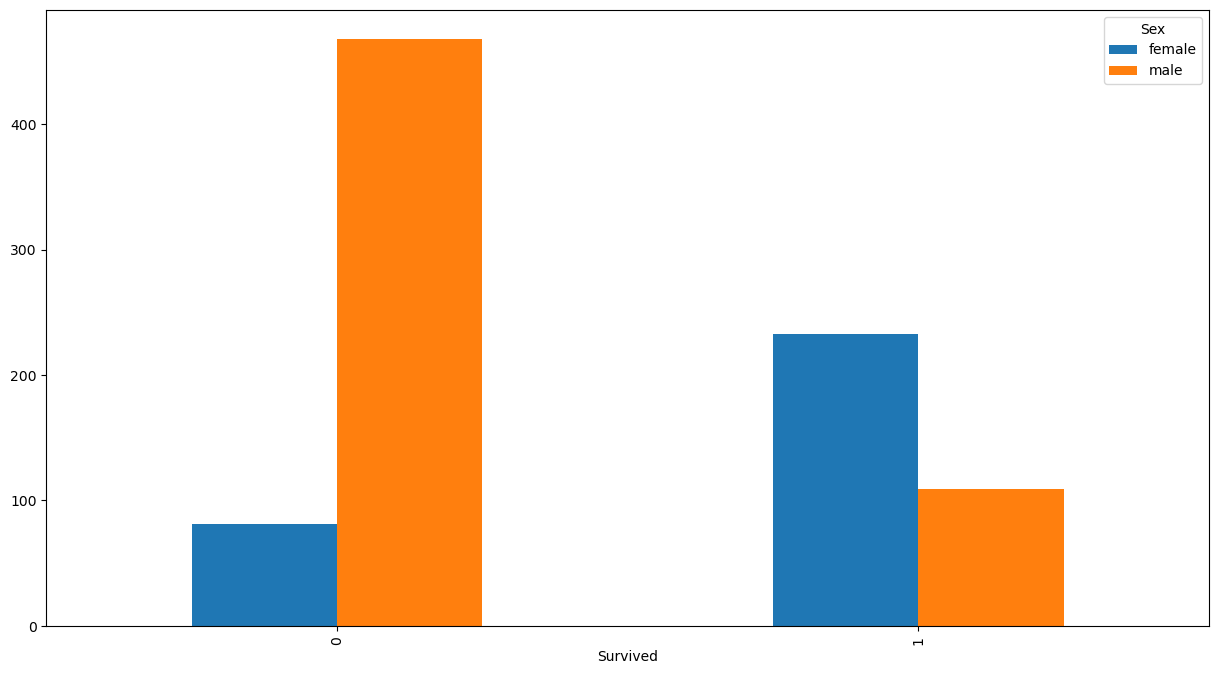

In [41]:
pivot.plot(kind='bar',figsize=(15,8))
plt.show()
# male have less survival than female

## P Class

In [71]:
# discrete
pivot = pd.crosstab(index=df["Pclass"],columns=df["Survived"])
pivot

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


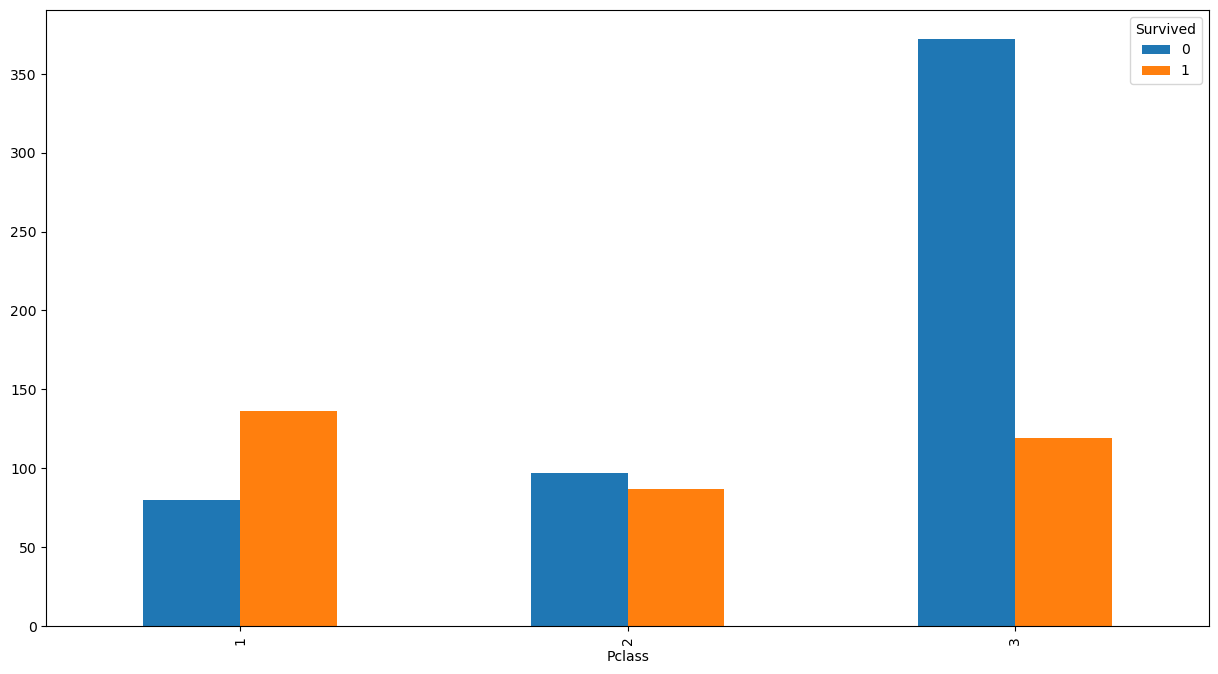

In [55]:
pivot.plot(kind='bar',figsize=(15,8))
plt.show()
# class 1 more survived
# class 2 less

In [58]:
pivot = pd.crosstab(index=[df['Sex'],df['Survived']],columns=df['Pclass'])
pivot

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

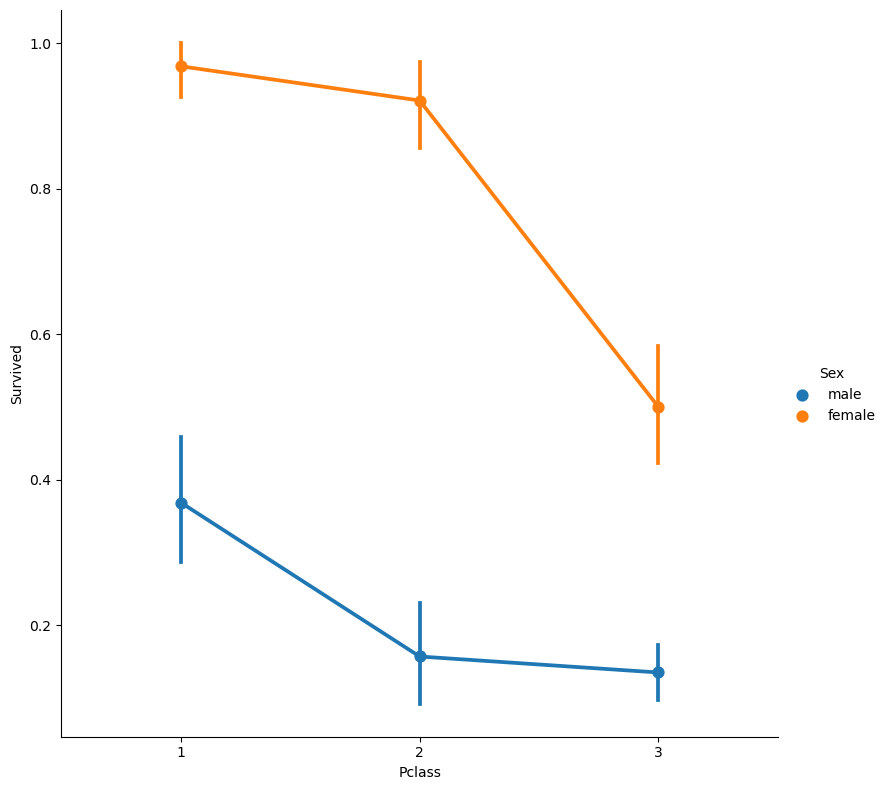

In [70]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point',height=8,aspect=1)
plt.show()
# almost 100% female from pclass 1 has survived

## Age

In [74]:
# continuous
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

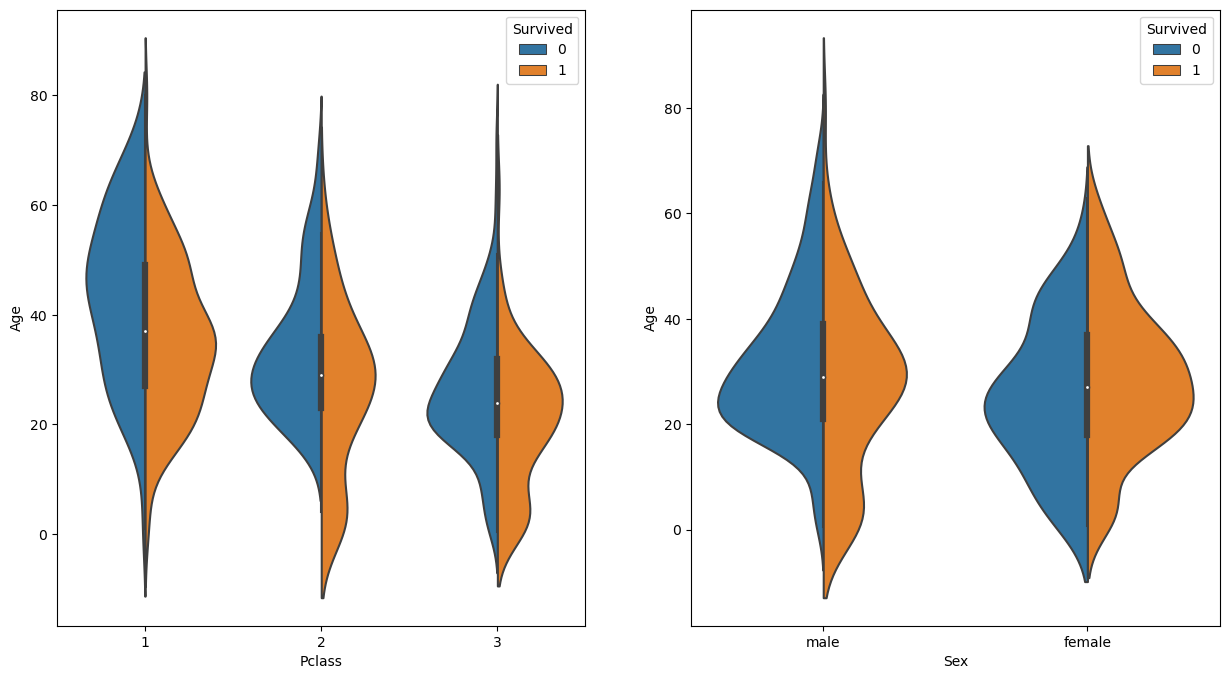

In [83]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.violinplot(data=df,x="Pclass",y="Age", hue = 'Survived',split=True)
plt.subplot(1,2,2)
sns.violinplot(data=df,x="Sex",y="Age",hue="Survived",split=True)
plt.show()

In [87]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
pd.crosstab([df['Pclass'], df['AgeGroup']], df['Survived'])

Survived          0   1
Pclass AgeGroup        
1      0–10       1   2
       11–20      3  15
       21–30     11  29
       31–40     12  37
       41–50     16  21
       51–60     10  15
       61–70      9   2
       71–80      2   1
2      0–10       0  17
       11–20      9   9
       21–30     36  25
       31–40     24  19
       41–50      9  10
       51–60     10   2
       61–70      2   1
3      0–10      25  19
       11–20     59  20
       21–30     99  30
       31–40     50  13
       41–50     28   2
       51–60      5   0
       61–70      2   1
       71–80      2   0

In [88]:
# In 1st class, a good number of older people survived.
# In 3rd class, most passengers were younger, but a majority died.
# The distribution is denser at younger ages for 2nd and 3rd classes.
# Surviving in 1st class seems to be more likely for a broader age group.

In [89]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
pd.crosstab([df['Sex'], df['AgeGroup']], df['Survived'])

Survived           0   1
Sex    AgeGroup         
female 0-10       12  19
       11-20      12  34
       21-30      20  61
       31-40       9  46
       41-50      10  21
       51-60       1  13
       61-70       0   3
male   0-10       14  19
       11-20      59  10
       21-30     126  23
       31-40      77  23
       41-50      43  12
       51-60      24   4
       61-70      13   1
       71-80       4   1

In [90]:
df['AgeQuantile'] = pd.qcut(df['Age'], 4)
pd.crosstab([df['Pclass'], df['AgeQuantile']], df['Survived'])

Survived                 0   1
Pclass AgeQuantile            
1      (0.419, 20.125]   4  17
       (20.125, 28.0]    8  23
       (28.0, 38.0]     12  36
       (38.0, 80.0]     40  46
2      (0.419, 20.125]   9  26
       (20.125, 28.0]   28  19
       (28.0, 38.0]     29  22
       (38.0, 80.0]     24  16
3      (0.419, 20.125]  84  39
       (20.125, 28.0]   81  24
       (28.0, 38.0]     58  18
       (38.0, 80.0]     47   4

In [91]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeQuantile    177
AgeGroup       177
dtype: int64

In [92]:
# use of regular expression
df['Initial'] = 0
for i in df:
  df['Initial'] = df['Name'].str.extract('([A-Za-z]+)\.')

In [93]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeQuantile,AgeGroup,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.125, 28.0]",21-30,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(28.0, 38.0]",31-40,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.125, 28.0]",21-30,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(28.0, 38.0]",31-40,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(28.0, 38.0]",31-40,Mr


In [94]:
pd.crosstab(df['Initial'],df['Sex'])

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [95]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [96]:
pd.crosstab(df['Initial'],df['Sex'])

Sex,female,male
Initial,,
Master,0,40
Miss,186,0
Mr,1,528
Mrs,127,0
Other,0,9


In [98]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [99]:
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial=='Other'),'Age']=46

In [100]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeQuantile    177
AgeGroup       177
Initial          0
dtype: int64

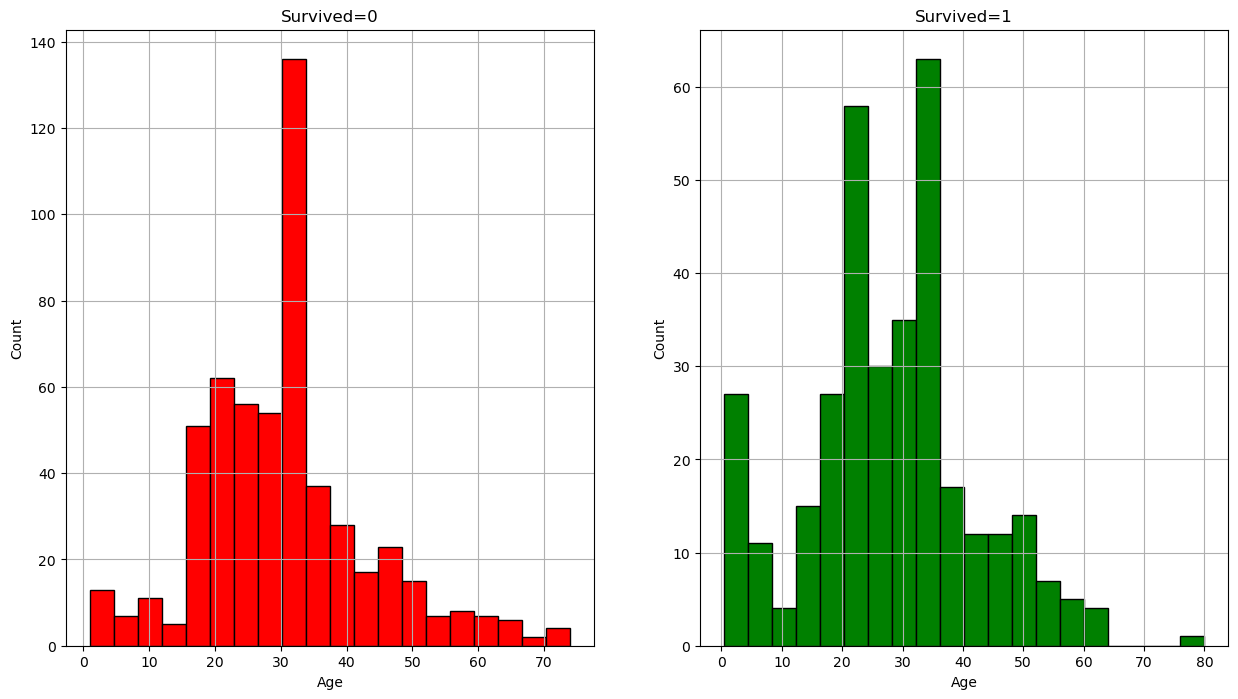

In [111]:
# distribution of Age data based on survived and non survived
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title("Survived=0")
df[df["Survived"]==0]["Age"].hist(bins=20,edgecolor='black',color='red')
plt.xlabel("Age")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.title("Survived=1")
df[df["Survived"]==1]["Age"].hist(bins=20,edgecolor='black',color='green')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

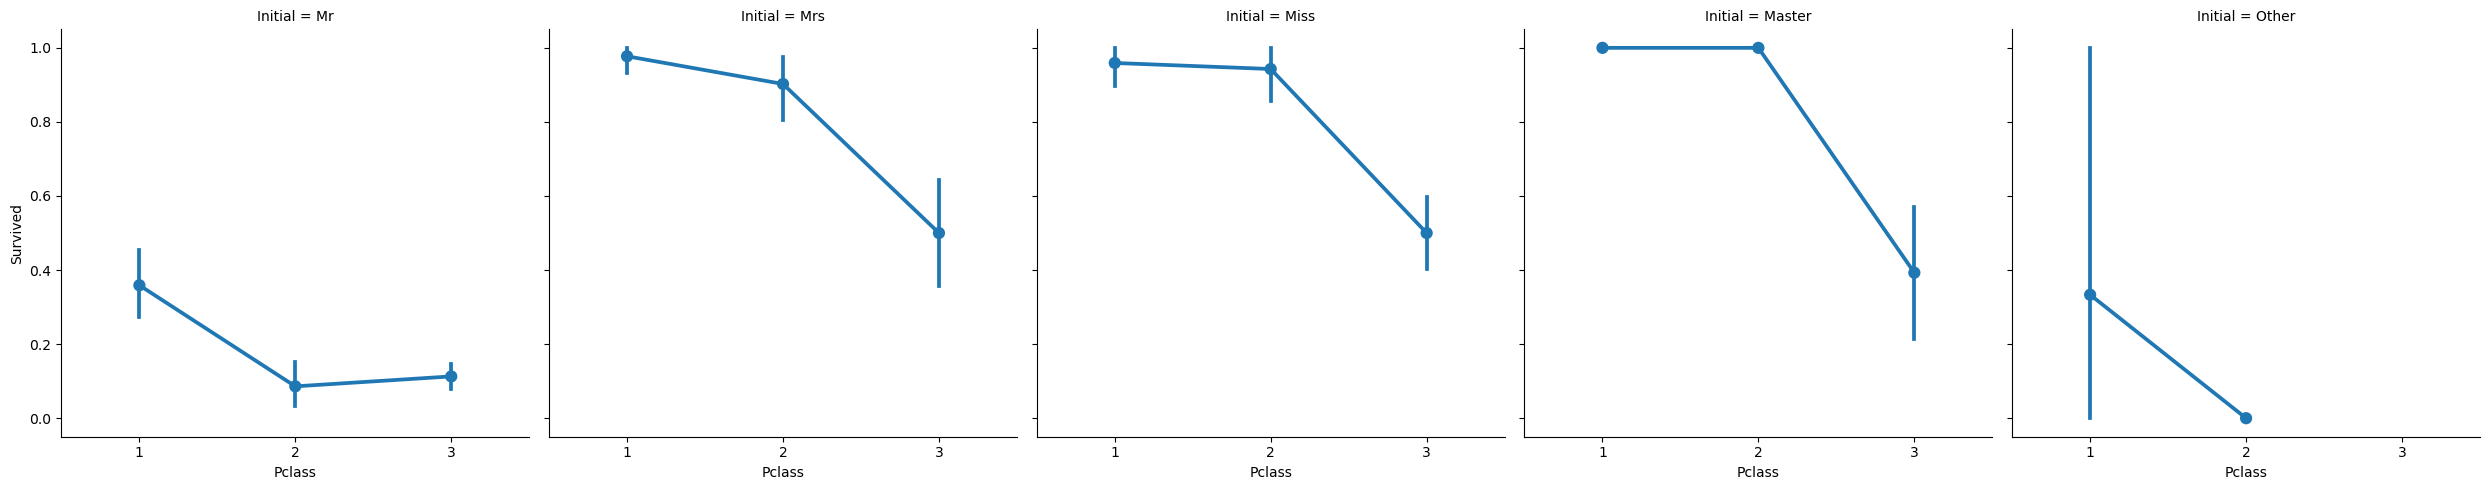

In [115]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=df, kind='point')
plt.show()

## Embarked

In [116]:
# nominal
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [121]:
pivot = pd.crosstab([df['Embarked'],df['Pclass']], [df['Sex'],df['Survived']], margins=True)
pivot

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

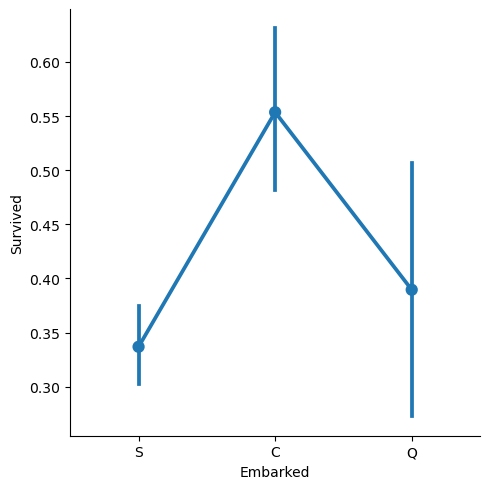

In [127]:
sns.catplot(x='Embarked', y='Survived', data=df, kind='point')

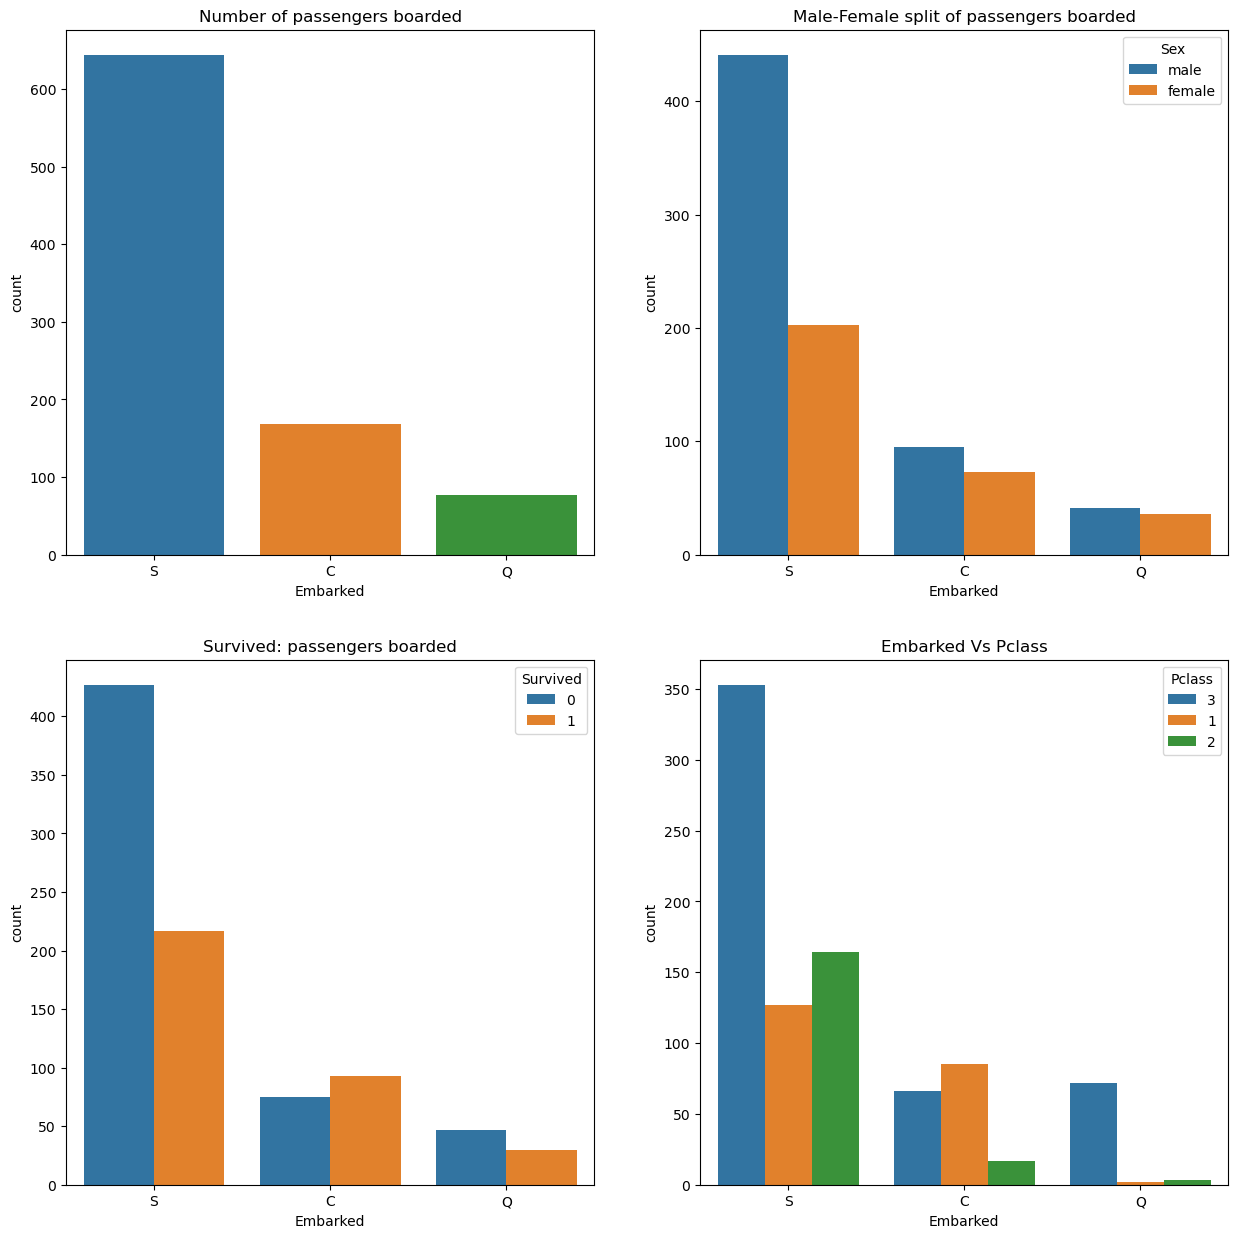

In [135]:
f, ax = plt.subplots(2,2,figsize=(15,15))
sns.countplot(data=df,x="Embarked",ax=ax[0,0])
ax[0,0].set_title("Number of passengers boarded")

sns.countplot(data=df,x="Embarked",hue="Sex",ax=ax[0,1])
ax[0,1].set_title("Male-Female split of passengers boarded")

sns.countplot(data=df,x="Embarked",hue=df["Survived"].astype(str),ax=ax[1,0])
ax[1,0].set_title("Survived: passengers boarded")

sns.countplot(data=df,x="Embarked",hue=df["Pclass"].astype(str),ax=ax[1,1])
ax[1,1].set_title("Embarked Vs Pclass")

plt.show()

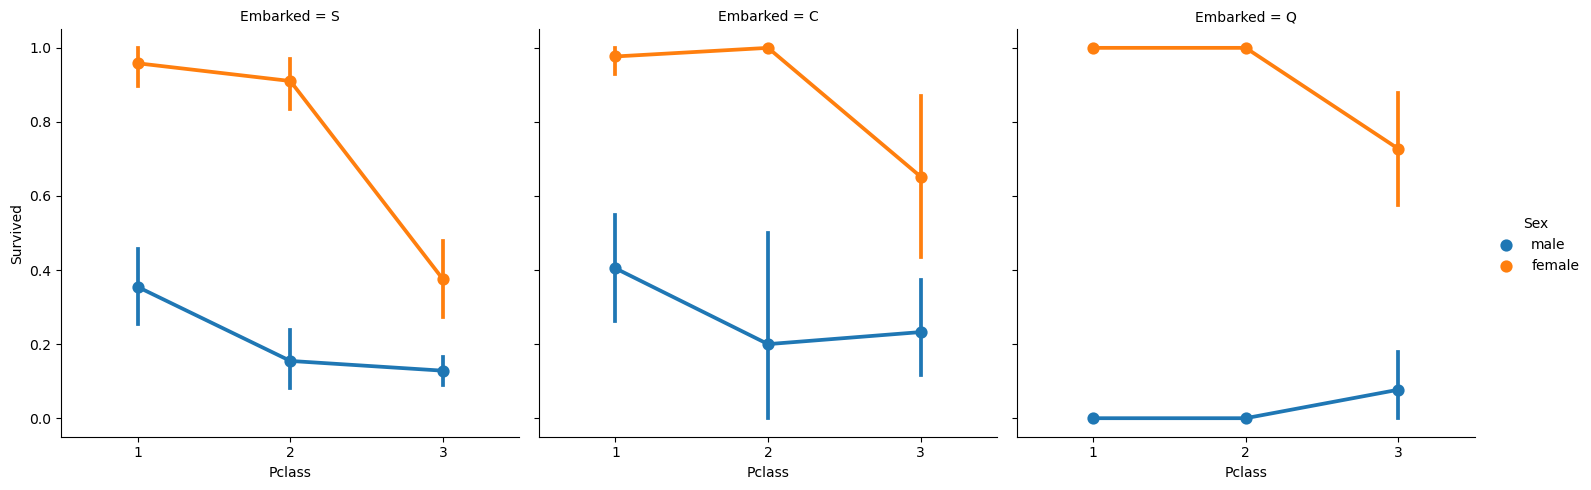

In [137]:
sns.catplot(data=df,x="Pclass",y="Survived",hue="Sex",col="Embarked",kind="point")
plt.show()

In [138]:
df["Embarked"].isnull().sum()

2

In [139]:
df['Embarked'].fillna('S',inplace=True)

In [140]:
df["Embarked"].isnull().sum()

0

In [141]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeQuantile    177
AgeGroup       177
Initial          0
dtype: int64

## SibSp

In [142]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [144]:
pivot = pd.crosstab(df['SibSp'],df['Survived'])
pivot

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<Axes: xlabel='SibSp'>

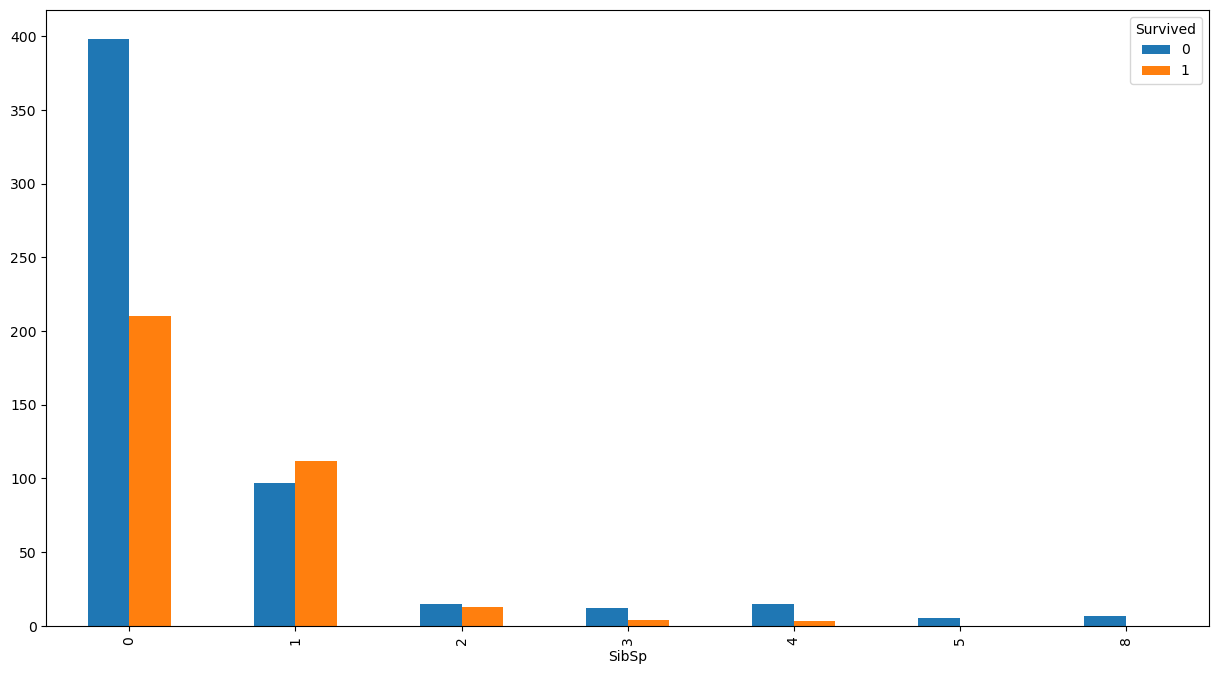

In [146]:
pivot.plot(kind="bar",figsize=(15,8))

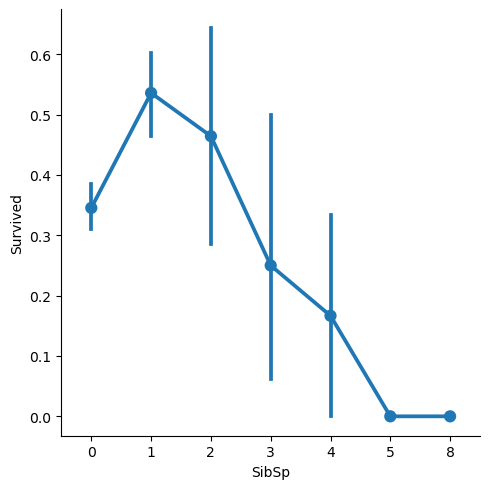

In [148]:
sns.catplot(data=df,x="SibSp",y="Survived",kind="point")

## Fare

In [149]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


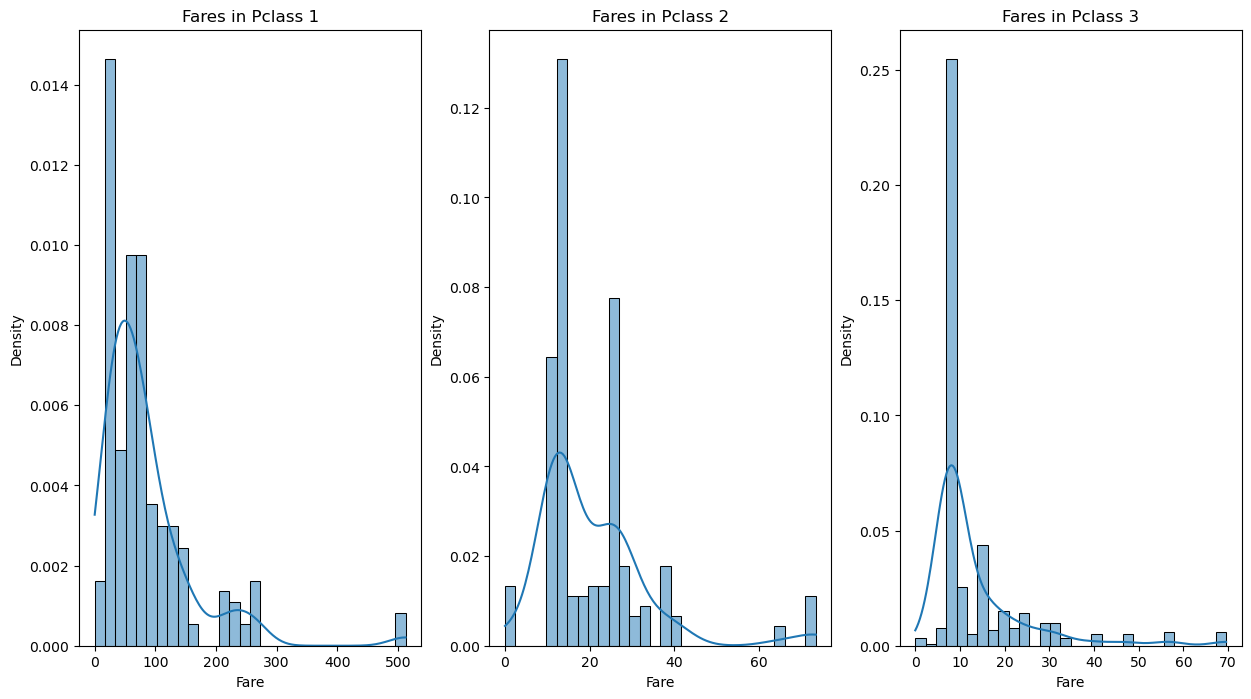

In [161]:
plt.figure(figsize=(15,8))

plt.subplot(1, 3, 1)
sns.histplot(df[df['Pclass'] == 1]['Fare'], kde=True, stat="density", bins=30)
plt.title("Fares in Pclass 1")
plt.xlabel("Fare")
plt.ylabel("Density")

# Plot for Pclass 2
plt.subplot(1, 3, 2)
sns.histplot(df[df['Pclass'] == 2]['Fare'], kde=True, stat="density", bins=30)
plt.title("Fares in Pclass 2")
plt.xlabel("Fare")
plt.ylabel("Density")

# Plot for Pclass 3
plt.subplot(1, 3, 3)
sns.histplot(df[df['Pclass'] == 3]['Fare'], kde=True, stat="density", bins=30)
plt.title("Fares in Pclass 3")
plt.xlabel("Fare")
plt.ylabel("Density")

plt.show()

In [162]:
# Sex : Women has more survival chance than men
# Pclass : Class 1 > class 2 > class 3
# Age : children with age 5 to 10 , 15 to 35 - died
# Embarked : C port has higher survival rate

## Correlation

In [169]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.041709,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.091497,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339582,0.083081,0.018443,-0.549500
Age,0.041709,-0.091497,-0.339582,1.000000,-0.267734,-0.198712,0.089087
SibSp,-0.057527,-0.035322,0.083081,-0.267734,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.198712,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.089087,0.159651,0.216225,1.000000


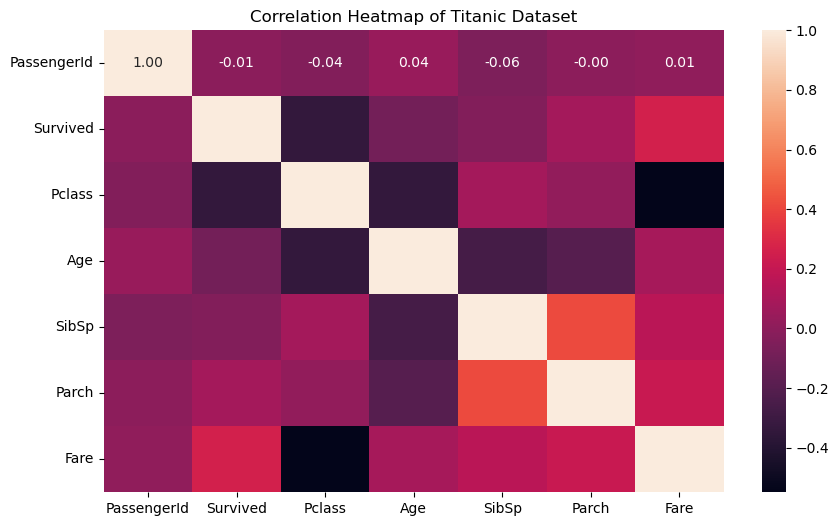

In [167]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

In [172]:
# discretization
# string to numerical